In [1]:
# импортируем библиотеки, классы, функции
import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import dask.bag as db
import dask.delayed

In [2]:
# используем функцию np.arange() для создания 
# массива NumPy со значениями от 0 до 10
np_arr = np.arange(11)
np_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
# преобразовываем массив NumPy в массив Dask
dask_arr = da.from_array(np_arr, chunks=5)

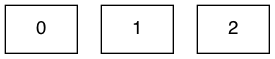

In [4]:
# визуализируем граф вычислений
dask_arr.visualize()

In [5]:
# взглянем на характеристики массива Dask
dask_arr

dask.array<array, shape=(11,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [6]:
# взглянем на массив
dask_arr.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
# вычисляем среднее
dask_arr.mean().compute()

5.0

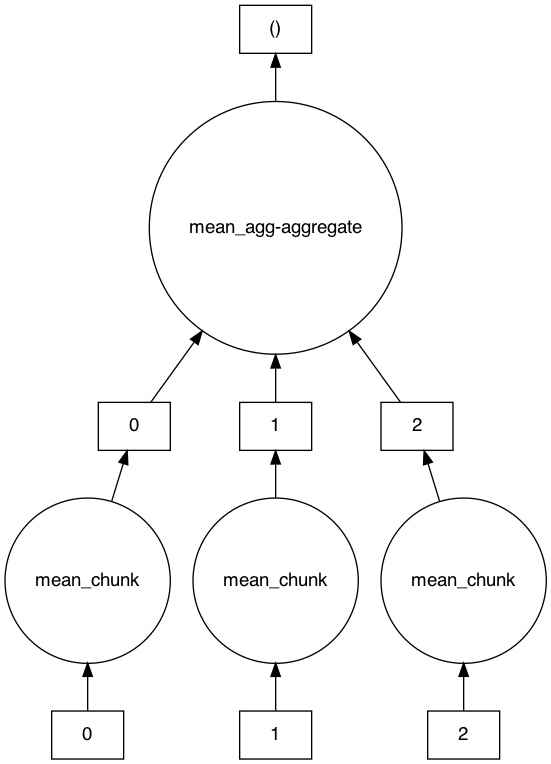

In [8]:
# визуализируем граф вычислений
res = dask_arr.mean()
res.visualize()

In [9]:
# смотрим размер каждого чанка
dask_arr.chunks

((5, 5, 1),)

In [10]:
# напрямую создаем массив Dask
dask_arr2 = da.arange(11, chunks=5)
dask_arr2.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [11]:
# создаем массив NumPy
x = np.random.rand(50 * 365 * 24 * 60 * 60)
x.shape

(1576800000,)

In [12]:
%%time

x_sum = x.sum()
x_sum

CPU times: user 1.99 s, sys: 1.7 s, total: 3.69 s
Wall time: 3.7 s


788404315.1567752

In [13]:
# создаем массив Dask
x_dask = da.from_array(x, chunks=len(x) // 8)
x_dask

dask.array<array, shape=(1576800000,), dtype=float64, chunksize=(197100000,), chunktype=numpy.ndarray>

In [14]:
%%time

x_dask_sum = x_dask.sum().compute() 
x_dask_sum

CPU times: user 3.14 s, sys: 27.2 ms, total: 3.17 s
Wall time: 413 ms


788404315.1567822

In [15]:
# создаем датафрейм Dask на основе CSV-файла
dask_df = dd.read_csv('Data/StateFarm.csv', sep=';')
# выведем первые 2 наблюдения
dask_df.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,18975.456110,65999,237,1,14,0,6,0
1,4715.321344,0,65,19,56,0,3,0


In [16]:
# создаем датафрейм pandas на основе CSV-файла
df = pd.read_csv('Data/StateFarm.csv', sep=';')
# превращаем датафрейм pandas в датафрейм Dask
dask_df2 = dd.from_pandas(df, npartitions=2)
dask_df2.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,18975.456110,65999,237,1,14,0,6,0
1,4715.321344,0,65,19,56,0,3,0


In [17]:
# создаем мешок Dask на основе списка
dask_bag = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)
# берем три элемента
dask_bag.take(3)

(1, 2, 3)

In [18]:
# создаем функции
def inc(x):
    return x + 1

def double(x):
    return x + 2

def add(x, y):
    return x + y

# создаем список
data = [1, 2, 3, 4, 5]

# создаем пустой список
output = []

# запускаем цикл
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

# получаем результат
total = sum(output)

In [19]:
# модифицируем код, обернув в delayed()
output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)
    
total = dask.delayed(sum)(output)

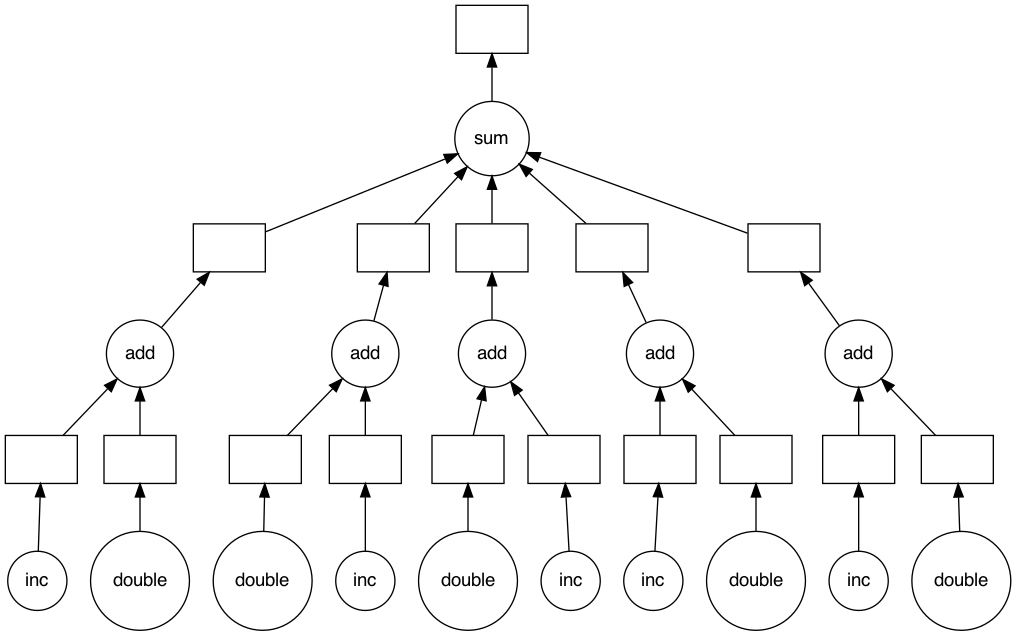

In [20]:
# визуализируем граф вычислений
total.visualize()

In [21]:
# получаем результат, применяя параллельные вычисления
total.compute()

45

In [22]:
# используем delayed() в качестве декоратора

@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def double(x):
    return x + 2

@dask.delayed
def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = dask.delayed(sum)(output)